# 1. Attribute selection in classification problems

### Curse of dimensionality

**Question** What is "curse of dimensionality"? What does it mean in practice?

**Question** How can we reduce the number of attributes in classification problems?


Download file seizure.csv containing information about the recording of brain activity of people (description of the dataset: https://archive.ics.uci.edu/dataset/388/epileptic+seizure+recognition).
Each row contains 178 subsequent EEG measurements conducted during 1 second (column), the last column represents the label y {1,2,3,4,5} (subjects in class 1 have epileptic seizure, other classes represent different control groups, such as eyes open (5), or eyes closed (4)).

The train and test split and normalization is already done. 
Your task is to classify the given data with k-NN with k=3 (as during previous laboratories) and measure the accuracy.

Next, try to eliminate redundant attributes. Reduce the number of attributes to 30. Use the SelectKBest class. Remember to fit it only on train data. To reduce the test data to obtain only remained parameters use transform method on fit SelectKBest object. Use mutual_info_classif measure to assess the relevance of attributes.


In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif

data = pd.read_csv("seizure.csv")
data_Y = data["y"]
data = data.drop(columns=["Name", "y"])

X_train, X_test, y_train, y_test = train_test_split(data, data_Y, test_size=0.33, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# classify the data with k-NN with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# measure the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

selector = SelectKBest(mutual_info_classif, k=30)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

knn.fit(X_train_selected, y_train)
y_pred = knn.predict(X_test_selected)

# measure the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4785243741765481
Accuracy: 0.48432147562582345


In the exercise above we set the number of features arbitrarily. 

**Question** How can we find the optimal number of attributes in machine learning problems?

# 2. Clustering

**Question** What is clustering? What can we achieve with clustering?

**Question** What clustering algorithms do you know?

# 3. K-means algorithm

**Question** What are the following steps of the k-means algorithm?

**Question** How can we choose the initial clusters?


**Exercise**
Given the following examples of grades od 5 students we want to divide them into 2 groups:

| Subject | A   | B   |
|---------|-----|-----|
| 1       | 1.0 | 1.0 |
| 2       | 1.5 | 2.0 |
| 3       | 3.0 | 3.0 |
| 4       | 5.0 | 7.0 |
| 5       | 3.5 | 5.0 |

We have chosen the two furthest students (using euclidean distance) as the initial clusters' centroids:

|Cluster|Centroid|A  |B  |
|-------|--------|---|---|
|C1     |k1      |1.0|1.0|
|C2     |k2      |5.0|7.0|

Perform the first iteration of k-means: divide all students into clusters and find the centroids of these clusters.


**Question** When the algorithm should stop?

**Question** What advantages and disadvantages of k-means clustering can you find?

# 4. K-means with scikit-learn

### 4.1. Download files mouse.csv and lines.csv. They have multiple examples described with 2 attributes.  You are given the functions to read files and plot the data. Use these functions to plot data from both files. Can you manually determine 3 clusters in each of the files?

In [6]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

def read_file(path):
    with open(path, newline='') as csvfile:
        reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)
        data = [row for row in reader]
        data = StandardScaler().fit_transform(data)
    return np.array(data)

def plot_data(data):
    plt.scatter(data[:,0], data[:, 1])
    plt.show()



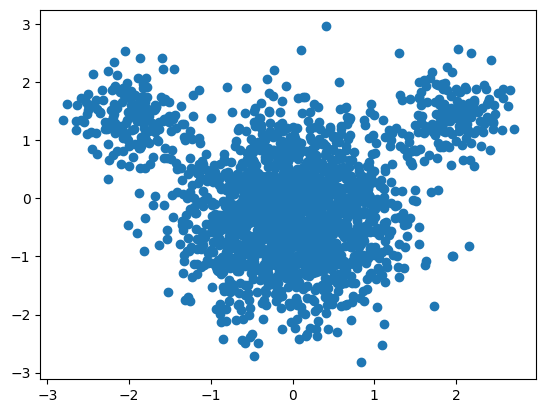

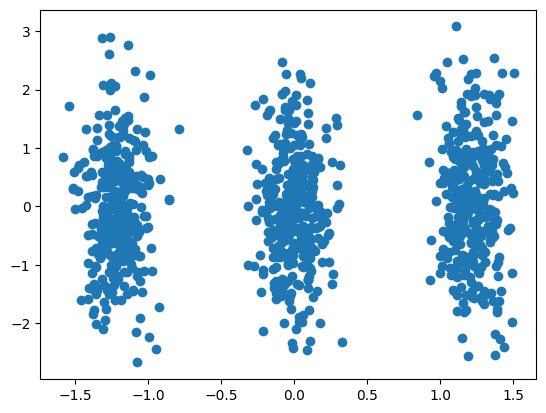

In [7]:
mouse_data = read_file("mouse.csv")
plot_data(mouse_data)

lines_data = read_file("lines.csv")
plot_data(lines_data)

### 4.2 Now, let's try to use k-means on the obtained dataset. Again, you are given a function to visualize the obtained plot. Your task is to use KMeans with propoer parameters on "mouse" and "lines" datasets and see if the clusters generated by k-means are the same that you suggested in the previous exercise.

See documentation and examples: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [9]:
def visualize_clusters(clusters, centroids): 
    #clusters: list of numpy arrays (each array with examples in one cluster)
    #centroids: numpy array
    for c in clusters:
        plt.scatter(c[:,0], c[:,1])
    plt.scatter(centroids[:,0], centroids[:,1], marker='+', color='black', s=100)
    plt.show()



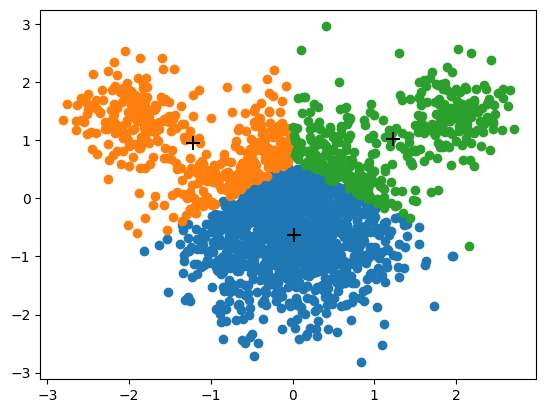

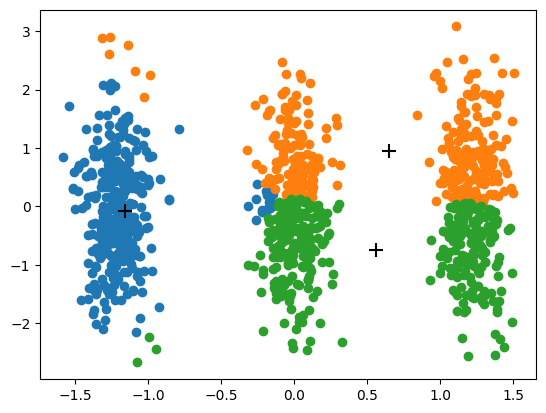

In [10]:
from sklearn.cluster import KMeans
mouse_data = read_file("mouse.csv")
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(mouse_data)
visualize_clusters([mouse_data[pred_y == i] for i in range(3)], kmeans.cluster_centers_)

lines_data = read_file("lines.csv")
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(lines_data)
visualize_clusters([lines_data[pred_y == i] for i in range(3)], kmeans.cluster_centers_)

# 5. Attribute selection in unsupervised problems

As in unsupervised learning problems (such as clustering) we do not have decision classess, so attribute selection methods based on info gain, chi2 etc. are not applicable here.

**Question** What can we do when we want to reduce the number of features in unsupervised problems?

We will try to use two attribute selection methods, which can be used in clustering (unsupervised learning): removing low-variance attributes and removing correlated attributes.

You are given code which reads real-world dataset containing data about customers and saves it in 'data' data frame. 

**Task** Perform attribute selection using the methods above. Firstly, you can use VarianceThreshold class (https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html). Try different values of threashold and compare how many attributes have been removed. Next, you can use corr() method of DataFrame to obtain the correlation matrix. What can we deduce from this matrix? How can we use it to feature selection? Try to implement proper attribute selection based on correlations.

In [11]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

data = pd.read_csv("customers.csv")
data = data.drop(columns="Address")
data.head()



Selected features: Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'DebtIncomeRatio'],
      dtype='object')


In [20]:
threshold = 0.3
selector = VarianceThreshold(threshold)
selector.fit(data)
selected_features = data.columns[selector.get_support()]
print("Selected features:", selected_features)

corr_matrix = data.corr()
print(corr_matrix)

# remove one of the two highly correlated features
selected_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            if colname not in selected_features:
                selected_features.add(colname)
                print("Removed feature:", colname)
                data = data.drop(columns=colname)

print("Selected features:", data.columns)


Selected features: Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'DebtIncomeRatio'],
      dtype='object')
                 Customer Id       Age       Edu  Years Employed    Income  \
Customer Id         1.000000 -0.004447 -0.031113       -0.035146 -0.017675   
Age                -0.004447  1.000000  0.012983        0.554241  0.476218   
Edu                -0.031113  0.012983  1.000000       -0.151117  0.218219   
Years Employed     -0.035146  0.554241 -0.151117        1.000000  0.625093   
Income             -0.017675  0.476218  0.218219        0.625093  1.000000   
Card Debt           0.001015  0.278912  0.099081        0.381744  0.551510   
Other Debt         -0.009061  0.337839  0.140938        0.414430  0.603356   
Defaulted          -0.004244 -0.137657  0.114676       -0.282978 -0.070970   
DebtIncomeRatio     0.014039  0.008240  0.008053       -0.033625 -0.035585   

                 Card Debt  Other Debt  Defaulted  DebtIncom

# Homework

* Write your own implementation of k-means algorithm with random centroid initialization and 2 stopping conditions: max iterations and centroid convergence (if all attributes of all centroids changes not more than some epsilon the algorithm should stop). 
* Use your implementation to cluster data about cereal products with their dietary characteristics (cereals.csv, 16 attributes). 
* It contains some nominal attributes (name, mfr, type). You can omit the first two of them. Type attribute is binary, so you can replace it with values 0 and 1.
* Perform the clustering of the cereals into 3 groups using k-means algorithm. 
* Remember to preprocess the data: normalization/standardization, attribute selection. 
* Try to describe the obtained groups based on the obtained centroids. What do all cereals within a certain group have in common?
* Write a report containing information about preprocessing methods that you used, number of cereals within each cluster, and your conclusions about the clustering results.

**Deadline +2 weeks**

In [24]:
# Let's start by implementing the k-means algorithm as requested. 
# The algorithm will include random centroid initialization and two stopping conditions: 
# max iterations and centroid convergence.

import numpy as np
from sklearn.preprocessing import StandardScaler

class KMeans:
    def __init__(self, k=3, max_iterations=100, epsilon=0.01):
        self.k = k
        self.max_iterations = max_iterations
        self.epsilon = epsilon
        self.centroids = None

    def initialize_centroids(self, data):
        """ Randomly initialize centroids """
        n_samples, n_features = data.shape
        centroids = np.zeros((self.k, n_features))
        for i in range(self.k):
            centroid = data[np.random.choice(range(n_samples))]
            centroids[i] = centroid
        return centroids

    def closest_centroid(self, data, centroids):
        """ Find the closest centroid for each data point """
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def compute_centroids(self, data, labels):
        """ Compute the centroids """
        n_features = data.shape[1]
        centroids = np.zeros((self.k, n_features))
        for i in range(self.k):
            centroids[i] = np.mean(data[labels == i], axis=0)
        return centroids

    def fit(self, data):
        """ Fit the model to the data """
        self.centroids = self.initialize_centroids(data)
        for _ in range(self.max_iterations):
            old_centroids = self.centroids.copy()
            labels = self.closest_centroid(data, self.centroids)
            self.centroids = self.compute_centroids(data, labels)
            diff = np.linalg.norm(self.centroids - old_centroids)
            if diff < self.epsilon:
                break
        return labels

# Now, let's load the cereal data, preprocess it, and apply the k-means clustering.
import pandas as pd

# Load data
data_path = 'cereal.csv'
cereal_data = pd.read_csv(data_path)

# Preprocess the data
# Omitting 'name' and 'mfr', and replacing 'type' with 0 and 1
cereal_data['type'] = cereal_data['type'].map({'C': 0, 'H': 1})
cereal_data.drop(['name', 'mfr'], axis=1, inplace=True)

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cereal_data)

# Apply k-means clustering
kmeans = KMeans(k=3, max_iterations=100, epsilon=0.01)
labels = kmeans.fit(scaled_data)

# Group the data by their clusters and analyze the centroids
clustered_data = pd.concat([cereal_data, pd.DataFrame({'cluster': labels})], axis=1)
cluster_summary = clustered_data.groupby('cluster').mean()

cluster_summary, np.bincount(labels)

KeyboardInterrupt: 